# LIBRARIES

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import datetime          as dt
import os

# Where are your images located?
## Please add the path below without quotation marks (e.g.: /home/user/file_with_images)

In [2]:
figs_path = str(input("Please enter the path to the images (please, do not add quotation marks): \n "))

Please enter the path to the images (please, do not add quotation marks): 
 ./galaxies


# Set the amount/range of galaxies that you'd like to classify

### How many galaxies would you like to classify?

In [3]:
gal_i = int(input("First galaxy? (Index like: 0 for the 1st, 1 for the second, etc.) \n "))
gal_f = int(input("Last galaxy? (Index like: 10 for the 10th, 20 for the 20th, etc.) \n "))

First galaxy? (Index like: 0 for the 1st, 1 for the second, etc.) 
 0
Last galaxy? (Index like: 10 for the 10th, 20 for the 20th, etc.) 
 3


In [4]:
list_of_galaxies = os.listdir(figs_path)

In [5]:
list_to_array = np.array(list_of_galaxies)
objects = list_to_array[gal_i:gal_f]

# Let's classify some galaxies, shall we?

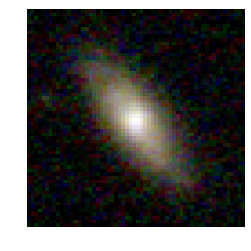

Lenticular? 
 If yes: 1 
 If no: 0 
 1


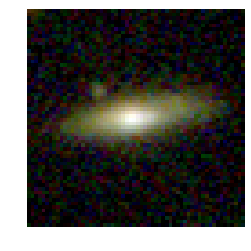

Lenticular? 
 If yes: 1 
 If no: 0 
 0


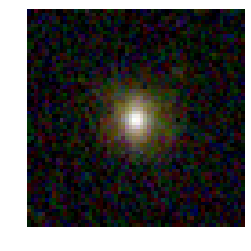

Lenticular? 
 If yes: 1 
 If no: 0 
 1

 
 

----------------------------------
----------------------------------
Thank you very much for your help!
----------------------------------
----------------------------------


In [6]:
output = []
for i in range(objects.size):
    img=mpimg.imread(os.path.join(figs_path, objects[i]))
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()
    answer = int(input('Lenticular? \n If yes: 1 \n If no: 0 \n '))
    if answer==0 or answer==1:
        output.append(objects[i])
        output.append(answer)
    else:
        print("Invalid Answer!! Please try again:")
        alternative = int(input('Lenticular? \n If yes: 1 \n If no: 0 \n '))
        output.append(alternative)
        if alternative!=0 or alternative!=1:
            print("LAST CHANCE! DO NOT MAKE A MISTAKE NOW!")
            alt = int(input("ATTENTION: \n YES=1 NO=2 \n Please type the correct answer: \n"))
            output.append(alt)
            if alt!=0 or alt!=1 :
                print("Wrong answer. Please try again later.")
                output.append('NAN')
            else:
                continue
        else:
            continue
output = np.array(output)
print("\n \n \n")
print("----------------------------------")
print("----------------------------------")
print("Thank you very much for your help!")
print("----------------------------------")
print("----------------------------------")

# Set the path to save your results

In [7]:
out_path = str(input("Where would you like to save it? \n "))

Where would you like to save it? 
 ./


In [8]:
today = dt.datetime.now().strftime("%d.%m.%Y")
now   = dt.datetime.now().strftime("%Hh%Mm%Ss")

In [9]:
output_df = pd.DataFrame(output.reshape(objects.size, 2))
output_df.columns = ['image', 'classification']
output_df.to_csv(os.path.join(out_path, 'output_%s_%s.csv' % (today, now)), index=False, header=True)

In [10]:
output_df

,image,classification
0,STRIPE82-0003_SPLUS.STRIPE82-0003.16082.griz_3...,1
1,STRIPE82-0003_SPLUS.STRIPE82-0003.05174.griz_3...,0
2,STRIPE82-0003_SPLUS.STRIPE82-0003.03903.griz_3...,1
